1. Machine learning which is considered as part of aritificial intelligrence is an algorithm that uses statistics to recoginzes patterns in large amounts of data, and is genreally for it to make predictions or decisions without human intervention. Machine learning is useful in multiple contenxt for example in large amounts of data ML performs well when dealing with large datasets that are too complex for traditional algorithms, for instance things such as predicting customer behavior. Which leads to my next point which is pattern recognition. ML is useful when identifying hidden patterns, trends, or correlations in data that are not immediately obvious, such as in image and speech recognition tasks. Furhtermroe, If data is continuously changing and requires real-time updates, ML can adapt and improve its performance without human intervention. Common applications include things such as fraud detection, and stock market predictions. ML is also useful when the input data is highly variable or unstructured (like text or images), ML can handle the complexity. Example of that is autonomous driving systems. Lastly, When decision-making involves balancing many variables, such as in supply chain optimization or energy management, ML provides efficient solutions by learning from experience.

    Now I will talk about instances when ML is not the best choice. Insufficient data ML models need a large volume of data to be effective. If you lack enough data, the model may perform poorly or fail to generalize. Moreover, If a problem has a clear, rule-based solution, traditional algorithms are simpler and more efficient. For example, basic mathematical calculations or sorting data. In situations where errors could be catastrophic (e.g., medical decisions), relying on deterministic, well-established methods may be safer than probabilistic ML models. ML is also problematic in a sense that building and maintaining ML systems requires significant resources, including computational power and expertise. If an organization lacks the infrastructure, ML might not be practical.

    In summary, ML is ideal for complex, data-rich problems but should be avoided when there is insufficient data, when simpler solutions exist, or when explainability and precision are critical.

In [67]:
#2.
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [68]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
#Handling Missing Data
#Filling in missing values in 'Age' with the median age. I didn't use mean due to extreme outliers present in the data
#and drop 'Cabin' column due to large number of NaN values so it's basically useless
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop('Cabin', axis=1, inplace=True)

#Filling in missing values in 'Embarked' with the most common value.
#Since it is likely more people embarked from the most common location.
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Step 2: Converted 'Sex' and 'Embarked' columns to numeric values for better data visualization.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Step 3: Created 'FamilySize' column by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,0


In [70]:
#3.
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#I deleted irrelevant columns and columns that caused error in code.
new_df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
new_df.corr()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.065997
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.108262,0.200988
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.245619
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,0.890712
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.783111
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,-0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.066516
FamilySize,0.016639,0.065997,0.200988,-0.245619,0.890712,0.783111,0.217138,0.066516,1.000000


<Axes: >

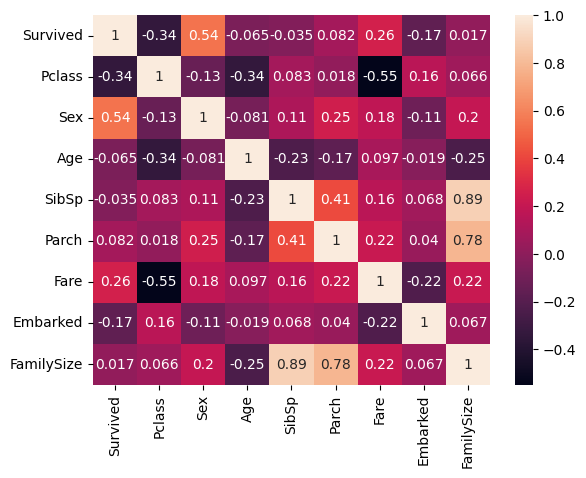

In [71]:
sns.heatmap(new_df.corr(), annot=True)


Sex is strongly correlated with Survived (0.54), indicating that females had a higher survival rate than males.

Pclass has a strong negative correlation with Survived (-0.34), suggesting that passengers in higher classes (1st class) were more likely to survive.

Fare shows a positive correlation with Survived (0.26), implying that wealthier passengers had better survival chances.

FamilySize, which combines SibSp and Parch, is moderately correlated with survival and captures the family structure’s impact.

Age and Survived show a slight negative correlation (-0.06), suggesting that younger passengers had a marginally better chance of survival, though the effect is weak.

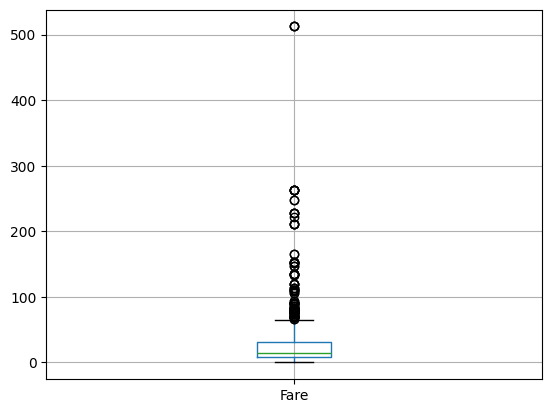

In [72]:
#4. I handled NaN values by replacing them with median similarly how I did it with Age in second question.
#The plot shows a right-skewed distribution with a few extremely high fare outliers,
#suggesting that a small number of passengers paid much more than the majority. 
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
boxplot = df.boxplot(column = ['Fare'], return_type='axes')

In [73]:
5.
import time


bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

#Method 1: Lambdas
start_time_lambda = time.time()
df['age_bin_lambda'] = df['Age'].apply(lambda x: 'Child' if x <= 12 else
                                       'Teenager' if x <= 18 else
                                       'Adult' if x <= 35 else
                                       'Middle-aged' if x <= 60 else 'Senior')
end_time_lambda = time.time()

#Method 2: Using pd.cut()
start_time_cut = time.time()
df['age_bin_cut'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
end_time_cut = time.time()

time_lambda = end_time_lambda - start_time_lambda
time_cut = end_time_cut - start_time_cut

df[['Age', 'age_bin_lambda', 'age_bin_cut']].head(), time_lambda, time_cut


(    Age age_bin_lambda  age_bin_cut
 0  22.0          Adult        Adult
 1  38.0    Middle-aged  Middle-aged
 2  26.0          Adult        Adult
 3  35.0          Adult  Middle-aged
 4  35.0          Adult  Middle-aged,
 0.001986980438232422,
 0.004190921783447266)

In [74]:
#after running data multiple times it seems that their performance is the same since sometimes pd.cut() performnce the task faster
#and other times lambdas perfoms it faster

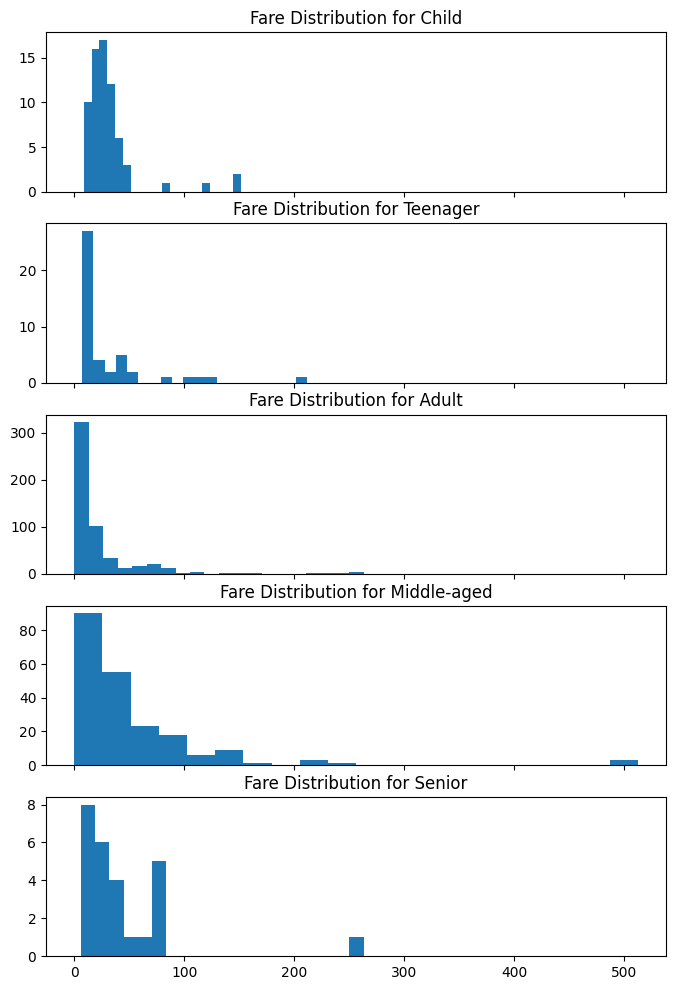

In [75]:
#5.
fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=True)

age_groups = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
counter = 0

for group in age_groups:
    subset = df[df['age_bin_cut'] == group]
    axes[counter].hist(subset['Fare'], bins=20)
    axes[counter].set_title(f'Fare Distribution for {group}')
    counter += 1

plt.show()

Children tend to have a lower fare distribution, likely reflecting their accommodation with family in lower-class cabins.

Teenagers and Adults show a broader range of fares, indicating a mix of different socio-economic backgrounds, with some paying significantly higher fares.

Middle-aged passengers, generally in the prime working years, have a wider distribution, with a substantial portion paying high fares, possibly indicating more affluent passengers in first-class.

Seniors show a varied fare range but also include some of the highest-paying individuals, suggesting older passengers in first-class accommodations.

The general trend shows that older passengers tended to pay more, likely reflecting a correlation between age and wealth